<a href="https://colab.research.google.com/github/manasamorthad/Machine-Learning/blob/main/PCA%2CLinear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv('/content/titanic_train.csv')
df.shape


(891, 12)

In [ ]:
df=df.drop(['PassengerId','Name','Ticket'],axis=1)


In [ ]:
[col for col in df.columns if df[col].isnull().sum()>0]

['Age', 'Cabin', 'Embarked']

In [ ]:
df['Age'] = df['Age'].fillna(df['Age'].median())

In [ ]:
df=df.drop(['Embarked','Cabin'],axis=1)


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
X = df.drop('Survived',axis=1)
y = df['Survived']

In [ ]:
X = pd.get_dummies(X,drop_first=True)

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_scaled.shape

(891, 6)

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


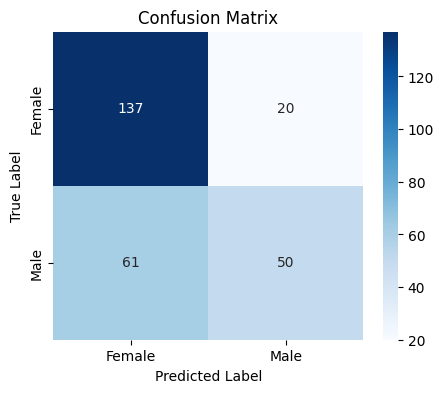

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Female', 'Male'], yticklabels=['Female', 'Male'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


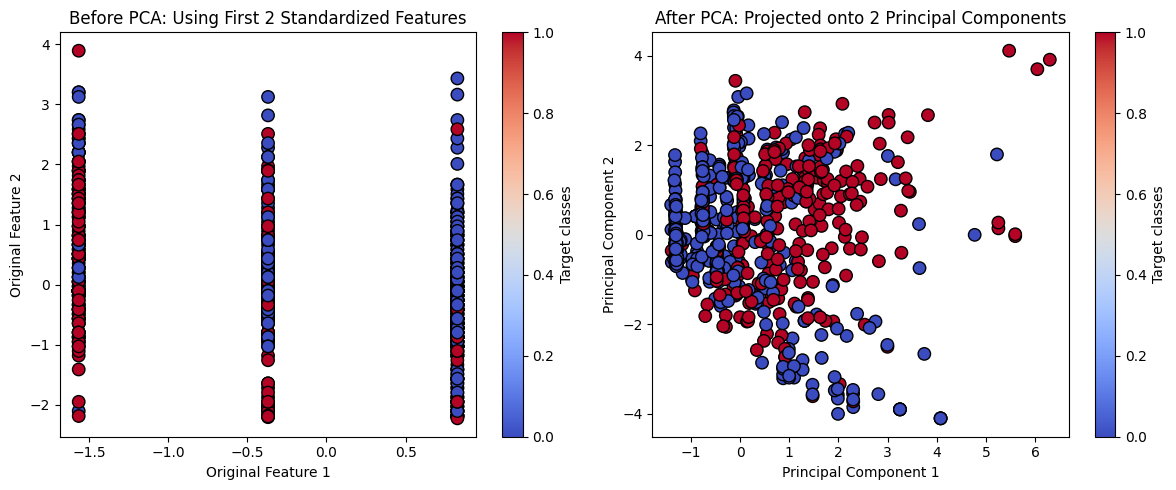

In [ ]:
y_numeric = pd.factorize(y)[0]

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_numeric, cmap='coolwarm', edgecolor='k', s=80)
plt.xlabel('Original Feature 1')
plt.ylabel('Original Feature 2')
plt.title('Before PCA: Using First 2 Standardized Features')
plt.colorbar(label='Target classes')

plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_numeric, cmap='coolwarm', edgecolor='k', s=80)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('After PCA: Projected onto 2 Principal Components')
plt.colorbar(label='Target classes')

plt.tight_layout()
plt.show()


Implement Linear regression on house price prediction. Show how much the dependent variable (y) changes with each unit change in the independent variable (x).

Display the intercept and slope values

Display the metric values (MSE,MAE and RMSE)

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("house_price_train.csv")

In [3]:
X = df[['GrLivArea']]   # Feature
y = df['SalePrice']

In [4]:
# Train linear regression model
model = LinearRegression()
model.fit(X, y)

# Predictions
y_pred = model.predict(X)

In [5]:
# Intercept and slope
print("Intercept (b):", model.intercept_)
print("Slope (m):", model.coef_[0])
print(f"Interpretation: For each additional sq.ft of living area, "
      f"the sale price increases by about {model.coef_[0]:.2f} USD")

Intercept (b): 18569.02585648722
Slope (m): 107.1303589658252
Interpretation: For each additional sq.ft of living area, the sale price increases by about 107.13 USD


In [7]:
# Metrics
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
rmse = np.sqrt(mse)

print("\nModel Evaluation Metrics:")
print("MSE:", mse)
print("MAE:", mae)
print("RMSE:", rmse)



Model Evaluation Metrics:
MSE: 3139843209.6665273
MAE: 37638.72898759625
RMSE: 56034.303865279944


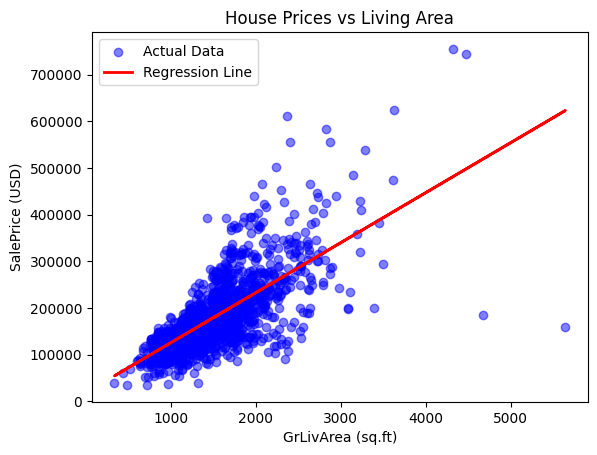

In [8]:
# Plot
plt.scatter(X, y, color='blue', alpha=0.5, label="Actual Data")
plt.plot(X, y_pred, color='red', linewidth=2, label="Regression Line")
plt.xlabel("GrLivArea (sq.ft)")
plt.ylabel("SalePrice (USD)")
plt.title("House Prices vs Living Area")
plt.legend()
plt.show()


2. work on Salary_Data.csv file (download from Kaggle or uci) and show much the dependent variable (salary-y) changes with each unit change in the independent variable (years of experience-x).

In [28]:
df1 = pd.read_csv("/content/Salary_Data.csv")

In [29]:
print(df1)

       Age  Gender    Education Level              Job Title  \
0     32.0    Male         Bachelor's      Software Engineer   
1     28.0  Female           Master's           Data Analyst   
2     45.0    Male                PhD         Senior Manager   
3     36.0  Female         Bachelor's        Sales Associate   
4     52.0    Male           Master's               Director   
...    ...     ...                ...                    ...   
6699  49.0  Female                PhD  Director of Marketing   
6700  32.0    Male        High School        Sales Associate   
6701  30.0  Female  Bachelor's Degree      Financial Manager   
6702  46.0    Male    Master's Degree      Marketing Manager   
6703  26.0  Female        High School        Sales Executive   

      Years of Experience    Salary  
0                     5.0   90000.0  
1                     3.0   65000.0  
2                    15.0  150000.0  
3                     7.0   60000.0  
4                    20.0  200000.0  
...

In [30]:
nan_count = df1['Years of Experience'].isna().sum()
print(f"Number of NaN values in 'Years of Experience': {nan_count}")

Number of NaN values in 'Years of Experience': 3


In [34]:

df1 = df1.dropna(subset=['Years of Experience', 'Salary'])

In [27]:
df1['Years of Experience'].isnull()

,Years of Experience
0,False
1,False
2,False
3,False
4,False
...,...
6699,False
6700,False
6701,False
6702,False


In [35]:
X = df1[['Years of Experience']]
y = df1['Salary']

In [36]:
# Create and fit the model
model = LinearRegression()
model.fit(X, y)

# Predictions
y_pred = model.predict(X)

# Extract coefficients
intercept = model.intercept_
slope = model.coef_[0]

In [37]:
# Error metrics
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
rmse = np.sqrt(mse)


print(f"Intercept: {intercept}")
print(f"Slope (Change in Salary for each Year of Experience): {slope}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Intercept: 58283.27509417885
Slope (Change in Salary for each Year of Experience): 7046.7683440275105
Mean Squared Error (MSE): 962743941.6787317
Mean Absolute Error (MAE): 24886.090421228608
Root Mean Squared Error (RMSE): 31028.115342036675


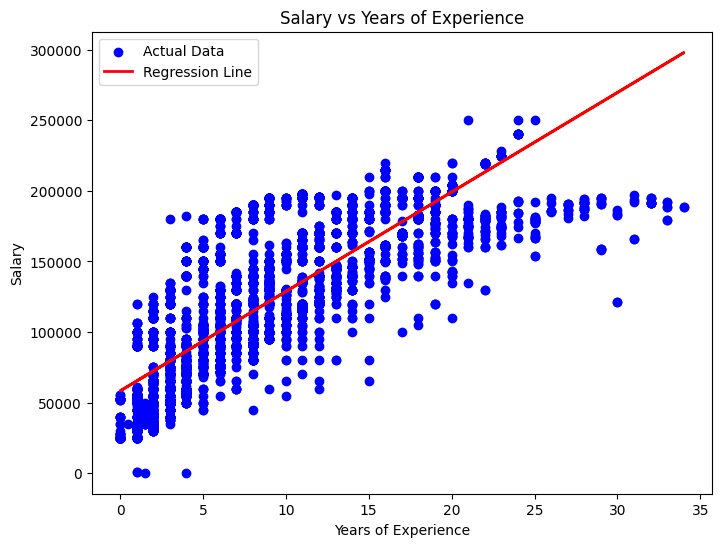

In [38]:
plt.figure(figsize=(8,6))
plt.scatter(X, y, color='blue', label="Actual Data")
plt.plot(X, y_pred, color='red', linewidth=2, label="Regression Line")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Salary vs Years of Experience")
plt.legend()
plt.show()